<a href="https://colab.research.google.com/github/SeyedJalaleddinMousavirad/Pytorch/blob/main/Linear_Regression_Normalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from google.colab import files
uploaded = files.upload()

Saving moore.csv to moore (2).csv


In [11]:
#Load data
data = pd.read_csv('moore (2).csv',header=None).values

In [72]:
X=data[:,0].reshape(-1,1)
Y=data[:,1].reshape(-1,1)

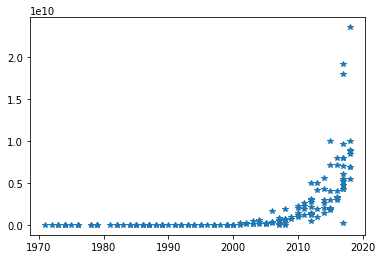

In [52]:
plt.plot(X,Y,'*')

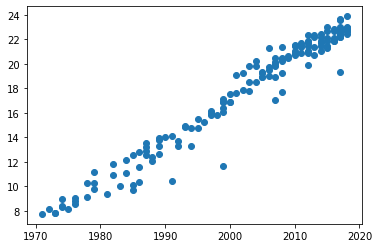

In [73]:
#Calculate the log to convert it into the linear points
Y=np.log(Y)
plt.scatter(X,Y)

In [74]:
#Scale and center both the x and y axes
mx=X.mean()
sx=X.std()
my=Y.mean()
sy=Y.std()
X=(X-mx)/sx
Y=(Y-my)/sy

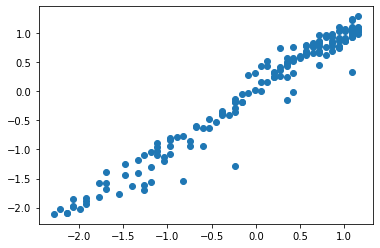

In [75]:
plt.scatter(X,Y)

In [76]:
# we want to conevrt it to float32
X=X.astype(np.float32)
Y=Y.astype(np.float32)

In [77]:
X.dtype

dtype('float32')

In [78]:
type(X)

numpy.ndarray

In [79]:
#Create the linear regression model
model = nn.Linear(1,1)

In [80]:
#Loss and Optimiser
criterion = nn.MSELoss()
optimizer = torch.optim.SGD (model.parameters(), lr=0.01, momentum = 0.7)

In [81]:
#Now, the X and Y are float32! We should convert it to torch tensor
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [34]:
type(inputs)


torch.Tensor

In [35]:
inputs.dtype

torch.float32

In [82]:
#Train the model
n_epochs=100
losses = []
for it in range(n_epochs):
  optimizer.zero_grad()

  #Forward pass
  outputs = model (inputs)
  loss = criterion (outputs, targets)

  #Record loss
  losses.append(loss.item())
  #Backward pass
  loss.backward()
  optimizer.step()

  print(f' Epoch {it+1} / {n_epochs}, Loss: {loss.item():.4f}')


 Epoch 1 / 100, Loss: 0.6417
 Epoch 2 / 100, Loss: 0.6178
 Epoch 3 / 100, Loss: 0.5788
 Epoch 4 / 100, Loss: 0.5314
 Epoch 5 / 100, Loss: 0.4807
 Epoch 6 / 100, Loss: 0.4300
 Epoch 7 / 100, Loss: 0.3815
 Epoch 8 / 100, Loss: 0.3365
 Epoch 9 / 100, Loss: 0.2958
 Epoch 10 / 100, Loss: 0.2594
 Epoch 11 / 100, Loss: 0.2273
 Epoch 12 / 100, Loss: 0.1993
 Epoch 13 / 100, Loss: 0.1750
 Epoch 14 / 100, Loss: 0.1541
 Epoch 15 / 100, Loss: 0.1362
 Epoch 16 / 100, Loss: 0.1210
 Epoch 17 / 100, Loss: 0.1080
 Epoch 18 / 100, Loss: 0.0970
 Epoch 19 / 100, Loss: 0.0877
 Epoch 20 / 100, Loss: 0.0798
 Epoch 21 / 100, Loss: 0.0732
 Epoch 22 / 100, Loss: 0.0676
 Epoch 23 / 100, Loss: 0.0629
 Epoch 24 / 100, Loss: 0.0590
 Epoch 25 / 100, Loss: 0.0557
 Epoch 26 / 100, Loss: 0.0529
 Epoch 27 / 100, Loss: 0.0505
 Epoch 28 / 100, Loss: 0.0486
 Epoch 29 / 100, Loss: 0.0469
 Epoch 30 / 100, Loss: 0.0456
 Epoch 31 / 100, Loss: 0.0444
 Epoch 32 / 100, Loss: 0.0435
 Epoch 33 / 100, Loss: 0.0426
 Epoch 34 / 100, Lo

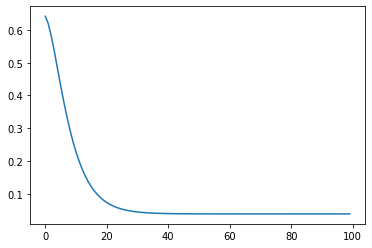

In [83]:
#Loss per iteration
plt.plot(losses)

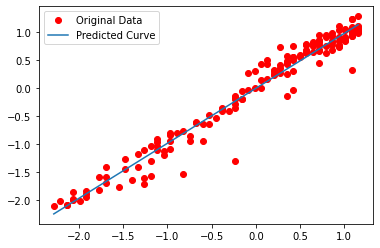

In [84]:
#Plot the graph
predicted = model (torch.from_numpy(X)).detach().numpy()
plt.plot(X,Y, 'ro', label='Original Data')
plt.plot(X,predicted,label='Predicted Curve')
plt.legend()
plt.show()

In [71]:
print(predicted)

[[-1.3144037 ]
 [-1.2722665 ]
 [-1.2301292 ]
 [-1.2301292 ]
 [-1.1879922 ]
 [-1.1879922 ]
 [-1.1879922 ]
 [-1.145855  ]
 [-1.1037178 ]
 [-1.1037178 ]
 [-1.1037178 ]
 [-1.0194434 ]
 [-1.0194434 ]
 [-0.9773063 ]
 [-0.9773063 ]
 [-0.9773063 ]
 [-0.89303195]
 [-0.8508948 ]
 [-0.8508948 ]
 [-0.8087576 ]
 [-0.7666204 ]
 [-0.7666204 ]
 [-0.72448325]
 [-0.72448325]
 [-0.72448325]
 [-0.68234605]
 [-0.68234605]
 [-0.68234605]
 [-0.6402089 ]
 [-0.6402089 ]
 [-0.6402089 ]
 [-0.6402089 ]
 [-0.5980717 ]
 [-0.5980717 ]
 [-0.55593455]
 [-0.55593455]
 [-0.55593455]
 [-0.55593455]
 [-0.5137974 ]
 [-0.4716602 ]
 [-0.4716602 ]
 [-0.429523  ]
 [-0.429523  ]
 [-0.38738585]
 [-0.38738585]
 [-0.34524867]
 [-0.34524867]
 [-0.3031115 ]
 [-0.13456278]
 [-0.3031115 ]
 [-0.26097432]
 [-0.21883713]
 [-0.21883713]
 [-0.21883713]
 [-0.17669995]
 [-0.13456278]
 [-0.13456278]
 [-0.0924256 ]
 [-0.0924256 ]
 [-0.13456278]
 [-0.13456278]
 [-0.13456278]
 [-0.0924256 ]
 [-0.05028842]
 [-0.05028842]
 [-0.00815125]
 [ 0.07612

In [85]:
#get w
w=model.weight.data.numpy()
print(w)

[[0.98054945]]


In [86]:
#Transforming Back to the original data
a=w[0,0]*sy/sx
print(a)

0.34167493698116397


# New section